# fetch_olivetti_facesを使って顔識別を行う

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

In [7]:
faces = fetch_olivetti_faces()

In [8]:
x = faces.images
y = faces.target

In [68]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [69]:
X_train = X_train.reshape(320,4096) / 255
X_test = X_test.reshape(80,4096) / 255

In [70]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [71]:
model = Sequential([
        Dense(512, input_shape=(4096,)),
        Activation('sigmoid'),
        Dense(40),
        Activation('softmax')
    ])

In [72]:
# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## モデルを使って学習する

In [73]:
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 2s 8ms/step - loss: 3.8229 - accuracy: 0.0243 - val_loss: 3.7477 - val_accuracy: 0.0312
Epoch 2/20
288/288 [==============================] - 1s 2ms/step - loss: 3.7492 - accuracy: 0.0174 - val_loss: 3.7709 - val_accuracy: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 1s 2ms/step - loss: 3.7331 - accuracy: 0.0174 - val_loss: 3.7900 - val_accuracy: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7238 - accuracy: 0.0382 - val_loss: 3.7994 - val_accuracy: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 0s 2ms/step - loss: 3.7281 - accuracy: 0.0174 - val_loss: 3.7866 - val_accuracy: 0.0000e+00
Epoch 6/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7265 - accuracy: 0.0208 - val_loss: 3.8121 - val_accuracy: 0.0000e+00
Epoch 7/20
288/288 [==============================] - 0s 1ms/step - loss: 3.7246 - 

## 結果の確認

In [74]:
# 予測
score = model.evaluate(X_test, y_test, verbose=1)
print('test accuracy : ', score[1])

80/80 [==============================] - 0s 273us/step
test accuracy :  0.0


## グラフ作成

In [75]:
import matplotlib.pyplot as plt

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

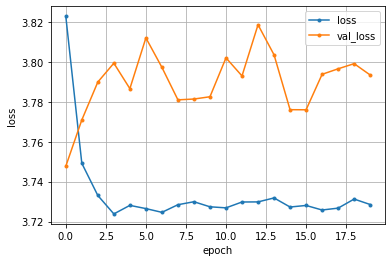

In [77]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

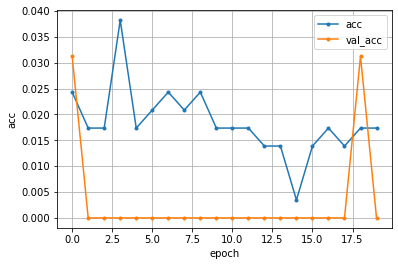

In [79]:
# accuracyのグラフ
plt.plot(range(20), acc, marker='.', label='acc')
plt.plot(range(20), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

## モデルを変えてみる(最適化をAdamに変えてみる)

In [18]:
model = Sequential([
        Dense(80, input_shape=(4096,)),
        Activation('relu'),
        Dense(160),
        Activation('relu'),
        Dense(40),
        Activation('softmax')
    ])

In [19]:
# 損失関数、 最適化アルゴリズムなどを設定しモデルのコンパイルを行う
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 0s 1ms/step - loss: 3.6944 - accuracy: 0.0243 - val_loss: 3.6947 - val_accuracy: 0.0312
Epoch 2/20
288/288 [==============================] - 0s 570us/step - loss: 3.6876 - accuracy: 0.0278 - val_loss: 3.6986 - val_accuracy: 0.0000e+00
Epoch 3/20
288/288 [==============================] - 0s 649us/step - loss: 3.6858 - accuracy: 0.0312 - val_loss: 3.7037 - val_accuracy: 0.0000e+00
Epoch 4/20
288/288 [==============================] - 0s 742us/step - loss: 3.6834 - accuracy: 0.0347 - val_loss: 3.7203 - val_accuracy: 0.0000e+00
Epoch 5/20
288/288 [==============================] - 0s 569us/step - loss: 3.6801 - accuracy: 0.0347 - val_loss: 3.7249 - val_accuracy: 0.0000e+00
Epoch 6/20
288/288 [==============================] - 0s 695us/step - loss: 3.6756 - accuracy: 0.0382 - val_loss: 3.7288 - val_accuracy: 0.0000e+00
Epoch 7/20
288/288 [==============================] - 0s 627us/step - los

In [21]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

### Loseグラフ

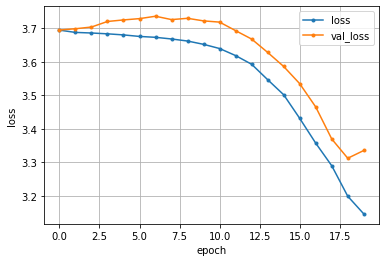

In [22]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### accのグラフ

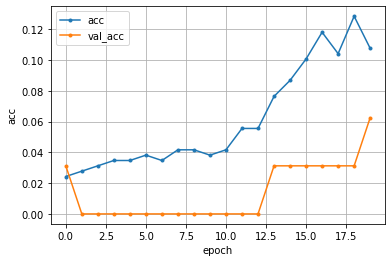

In [23]:
# accuracyのグラフ
plt.plot(range(20), acc, marker='.', label='acc')
plt.plot(range(20), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# Adamなどを調整する

In [24]:
from keras import optimizers

In [28]:
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)

In [43]:
model.compile(loss='mean_squared_error', optimizer=adam)

In [44]:
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 0s 1ms/step - loss: 0.0118 - val_loss: 0.0161
Epoch 2/20
288/288 [==============================] - 0s 561us/step - loss: 0.0097 - val_loss: 0.0134
Epoch 3/20
288/288 [==============================] - 0s 722us/step - loss: 0.0081 - val_loss: 0.0137
Epoch 4/20
288/288 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 0.0139
Epoch 5/20
288/288 [==============================] - 0s 708us/step - loss: 0.0075 - val_loss: 0.0130
Epoch 6/20
288/288 [==============================] - 0s 746us/step - loss: 0.0070 - val_loss: 0.0130
Epoch 7/20
288/288 [==============================] - 0s 717us/step - loss: 0.0072 - val_loss: 0.0134
Epoch 8/20
288/288 [==============================] - 0s 706us/step - loss: 0.0065 - val_loss: 0.0135
Epoch 9/20
288/288 [==============================] - 0s 728us/step - loss: 0.0064 - val_loss: 0.0119
Epoch 10/20
288/288 [====================

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

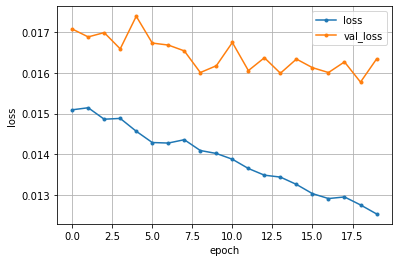

In [35]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [46]:
score = model.evaluate(x=X_test, y=y_test, batch_size=10, verbose=1, sample_weight=None, steps=None)
print("score:",score)

80/80 [==============================] - 0s 286us/step
score: 0.011401350900996476


In [80]:
model.compile(loss='categorical_crossentropy', optimizer=adam)
# 学習処理の実行
history = model.fit(X_train, y_train, batch_size=10, verbose=1, epochs=20, validation_split=0.1)

Train on 288 samples, validate on 32 samples
Epoch 1/20
288/288 [==============================] - 1s 3ms/step - loss: 5.0187 - val_loss: 4.2877
Epoch 2/20
288/288 [==============================] - 1s 4ms/step - loss: 4.1012 - val_loss: 3.8886
Epoch 3/20
288/288 [==============================] - 2s 7ms/step - loss: 3.8598 - val_loss: 3.8361
Epoch 4/20
288/288 [==============================] - 1s 4ms/step - loss: 3.8482 - val_loss: 3.7725
Epoch 5/20
288/288 [==============================] - 1s 3ms/step - loss: 3.7736 - val_loss: 3.8810
Epoch 6/20
288/288 [==============================] - 1s 3ms/step - loss: 3.7614 - val_loss: 3.8391
Epoch 7/20
288/288 [==============================] - 1s 2ms/step - loss: 3.7183 - val_loss: 3.7413
Epoch 8/20
288/288 [==============================] - 1s 3ms/step - loss: 3.7153 - val_loss: 3.7035
Epoch 9/20
288/288 [==============================] - 1s 2ms/step - loss: 3.6754 - val_loss: 3.6415
Epoch 10/20
288/288 [==============================] - 

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

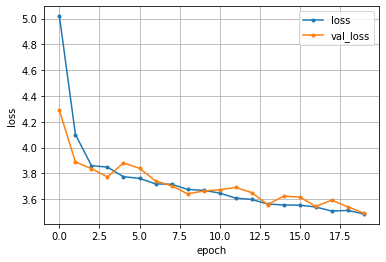

In [82]:
# lossのグラフ
plt.plot(range(20), loss, marker='.', label='loss')
plt.plot(range(20), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [83]:
score = model.evaluate(x=X_test, y=y_test, batch_size=10, verbose=1)
print("score:",score)

80/80 [==============================] - 0s 707us/step
score: 3.5618256628513336


## PCAを用いた主成分分析

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [80]:
faces = fetch_olivetti_faces()

In [82]:
print(faces.keys())
print(faces.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


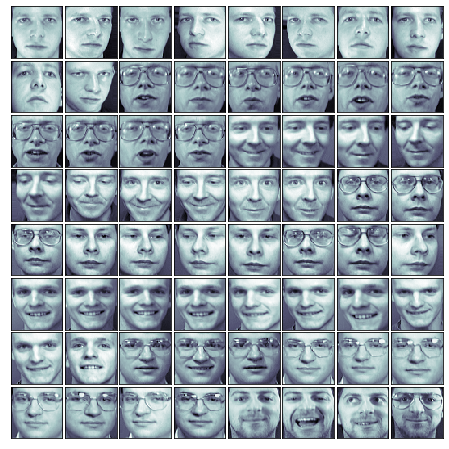

In [83]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')

plt.show()

In [84]:
X,y = faces.data,faces.target
pca = PCA(64)
X_proj = pca.fit_transform(X)
X_proj.shape

(400, 64)

## VGG16を用いた転移学習

In [1]:
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [31]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten

In [9]:
faces = fetch_olivetti_faces()

In [10]:
x = faces.images
y = faces.target

In [32]:
img_rows, img_cols = 64, 64
input_tensor = Input(shape=(img_rows, img_cols, 3))

In [34]:
model = VGG16(input_tensor=input_tensor, weights=None, include_top=False, classes=40)

In [35]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [39]:
top_model = Sequential()
top_model.add(Flatten(input_shape=VGG16.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(nb_classes, activation='softmax'))
model = Model(inputs=VGG16.input, outputs=top_model(VGG16.output))
model.summary()

AttributeError: 'function' object has no attribute 'output_shape'

## RandomForestClassifierを使って特徴量重要度の可視化

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [2]:
faces = fetch_olivetti_faces()

In [54]:
x = faces.data
y = faces.target

In [18]:
indices = y < 5
x1 = x[indices]
y1 = y[indices]

In [21]:
print(len(x),len(x1),len(y),len(y1))

400 50 400 50


### 枚数が400枚の場合

In [28]:
#ランダムフォレストの学習を行う
estimator = RandomForestClassifier(n_estimators=1000)
estimator.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
importance = estimator.feature_importances_
importances = importance.reshape(faces.images[0].shape) 

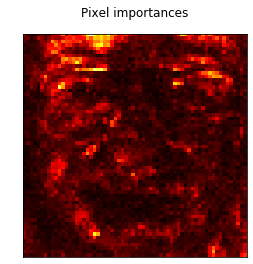

In [31]:
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances")
plt.tick_params(length=0)
plt.xticks(color="None")
plt.yticks(color="None")
plt.show()

### 枚数が50枚の場合

In [32]:
#ランダムフォレストの学習を行う
estimator = RandomForestClassifier(n_estimators=1000)
estimator.fit(x1,y1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
importance = estimator.feature_importances_
importances = importance.reshape(faces.images[0].shape) 

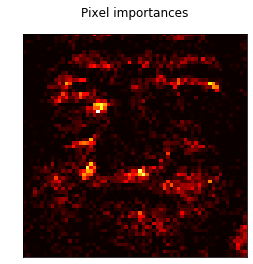

In [34]:
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances")
plt.tick_params(length=0)
plt.xticks(color="None")
plt.yticks(color="None")
plt.show()

## 10枚ずつ確認を行う

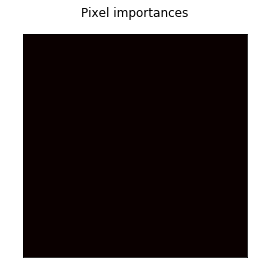

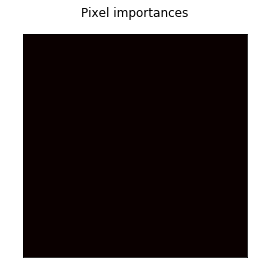

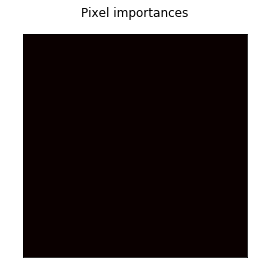

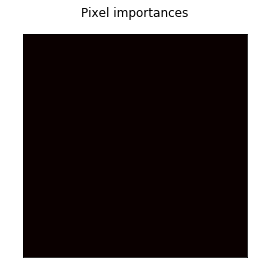

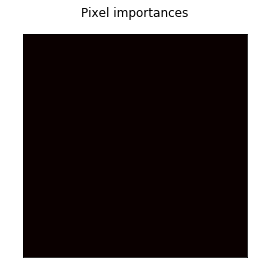

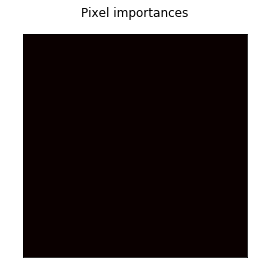

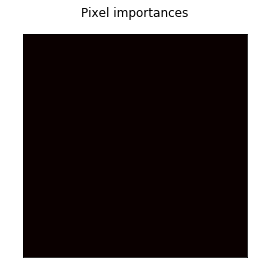

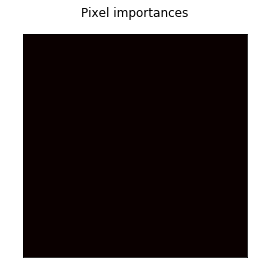

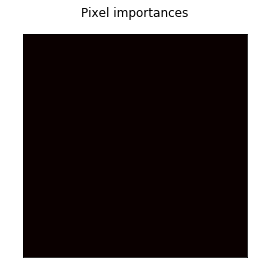

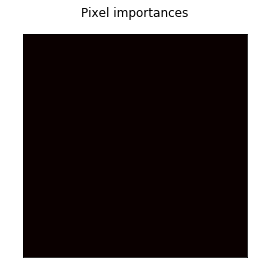

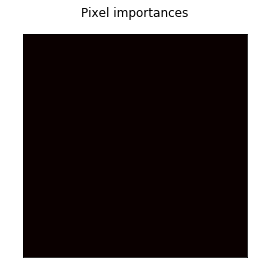

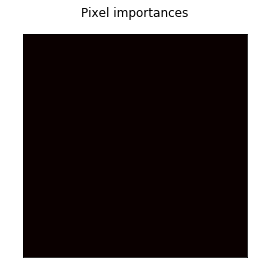

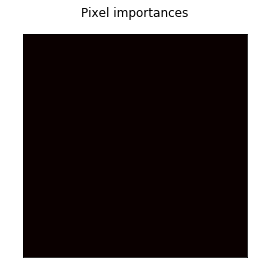

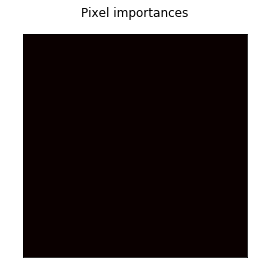

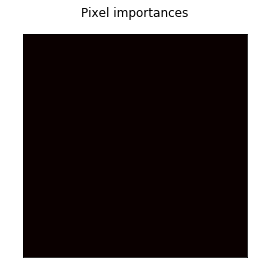

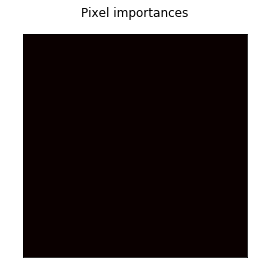

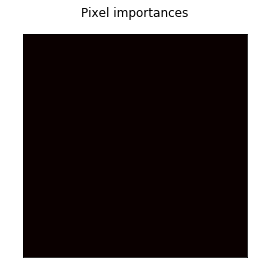

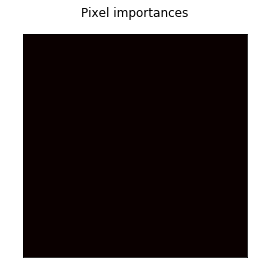

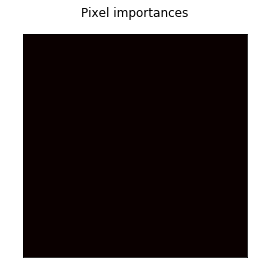

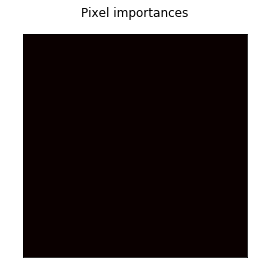

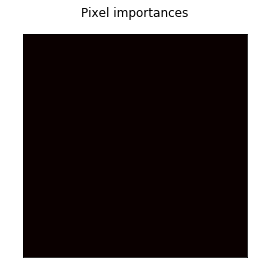

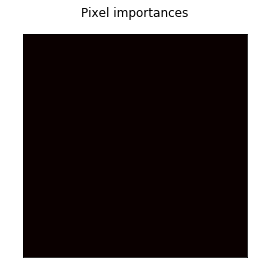

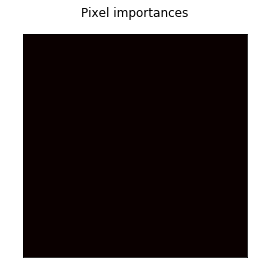

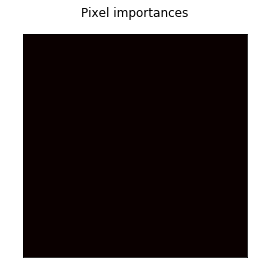

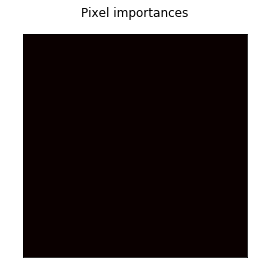

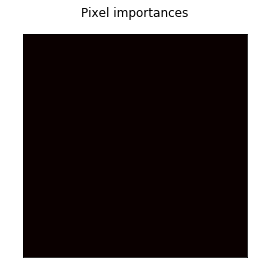

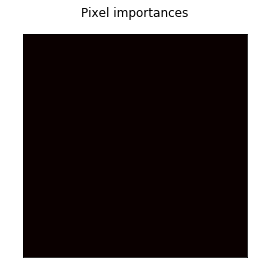

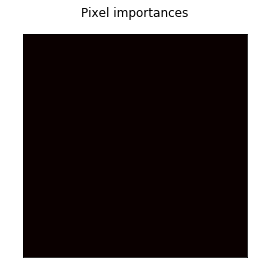

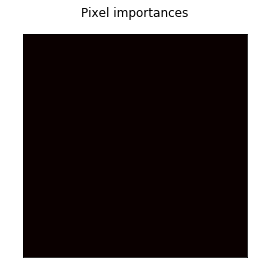

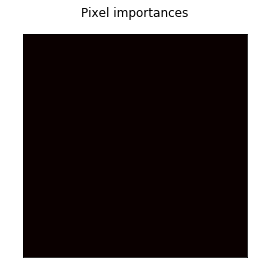

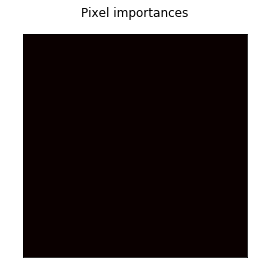

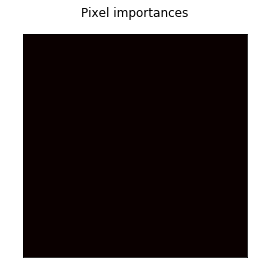

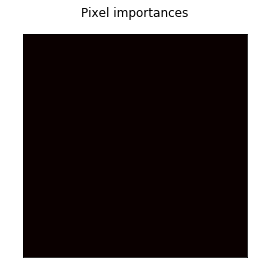

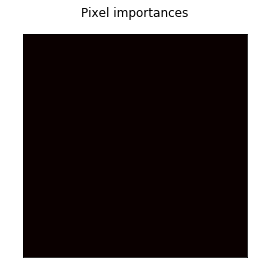

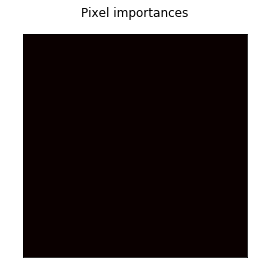

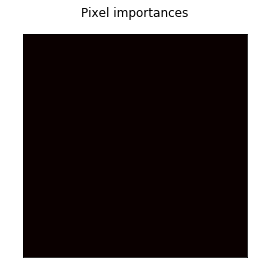

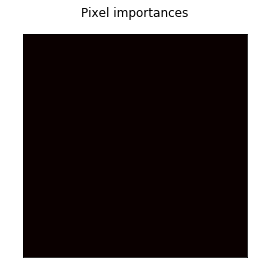

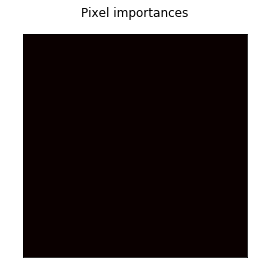

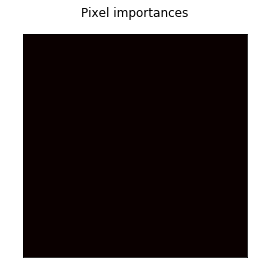

In [76]:
j = 0
for i in range(10,400,10):
    estimator.fit(x[j:i],y[j:i])
    j += 10
    importance = estimator.feature_importances_
    importances = importance.reshape(faces.images[0].shape)
    plotImage(importances)

In [75]:
def plotImage(importances):
    plt.matshow(importances, cmap=plt.cm.hot)
    plt.title("Pixel importances")
    plt.tick_params(length=0)
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.show()